# Loan Amount Prediction ML Model

The loan amount prediction model will use the Loan Dataset (https://www.kaggle.com/datasets/burak3ergun/loan-data-set) (614 samples, 13 features) to predict the loan amount a customer might qualify for based on their financial and demographic information.

I will be comparing performance between a Linear Regression model and an XGBoost model to identify the best predictor for loan amounts, generating optimal results.

## Objective
The banking industry currently faces challenges in determining appropriate loan amounts, with traditional methods relying heavily on manual processing by loan officers. This project aims to develop a machine learning solution using regression algorithms to automate and optimize the loan amount prediction process.

**Current Industry Challenges:**
Manual review and calculation of loan eligibility and amount by loan officers
Time-consuming process
Inconsistent assessment criteria across different applications

**The significance of this project lies in its ability to:**  
- Automates loan amount predictions to enable faster and more accurate lending decisions for financial institutions.  
- Reduces risks by leveraging advanced machine learning models like Random Forest and XGBoost.  
- Identifying complex patterns in financial data through predictive analytics.  
- Maintain consistent evaluation criteria  

## Imports

In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb # type: ignore

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

## Exploratory Data Analysis

In [384]:
train_data = pd.read_csv("C:\\Tejas\\Programming\\Python\\Projects\\Loan_Amount_ML_Predictor\\loan_data_set.csv")

# There are 614 columns in the raw dataset
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Dropping duplicate and non-useful values

In [385]:
train_data.drop_duplicates(inplace=True)
train_data.drop(['Loan_ID'], axis=1, inplace=True)
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Correlation Plot Heatmap

<Axes: >

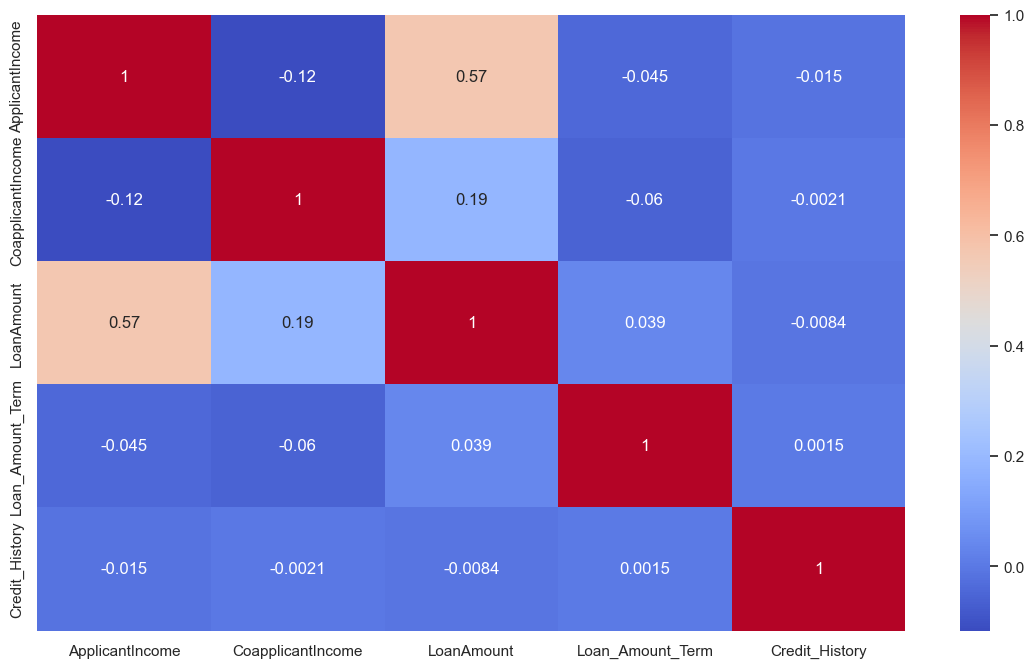

In [386]:
plt.figure(figsize=(14,8))
sns.heatmap(train_data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')

### Exploring Relationships between Variables

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

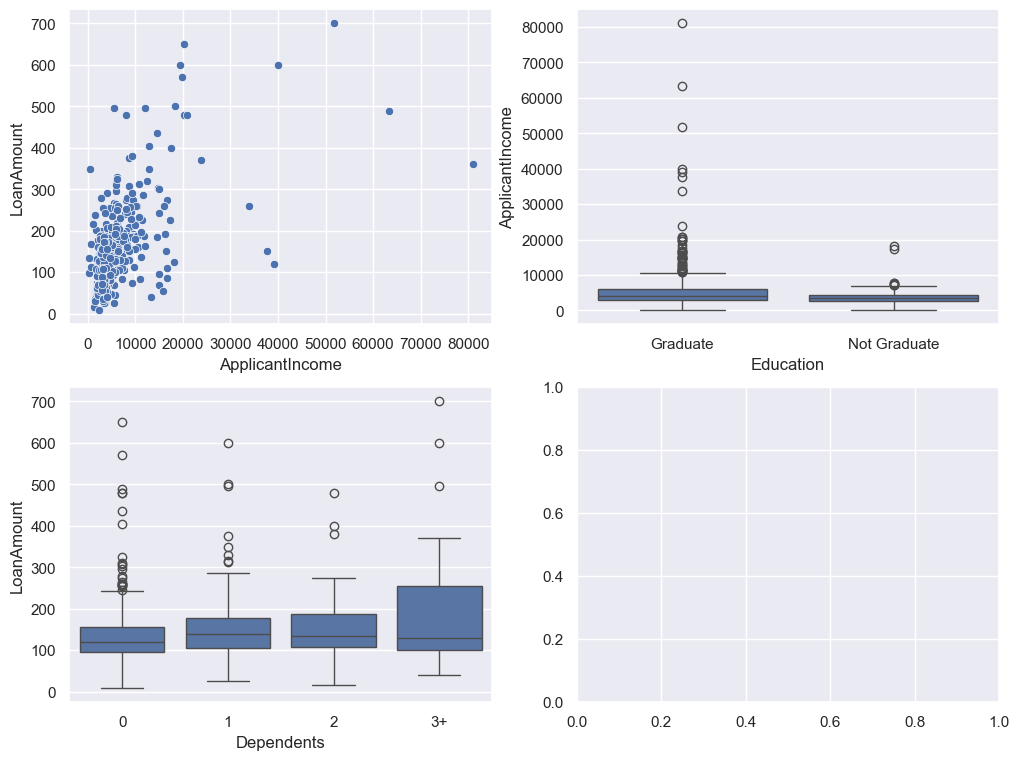

In [ ]:
sns.set(style='darkgrid')

fig, axs = plt.subplots(2,2, figsize=(12, 9))

sns.scatterplot(data=train_data, x='ApplicantIncome', y='LoanAmount', ax=axs[0,0])

sns.boxplot(data=train_data, x='Education', y='ApplicantIncome', ax=axs[0,1])

sns.boxplot(data=train_data, x='Dependents', y='LoanAmount', ax=axs[1,0])

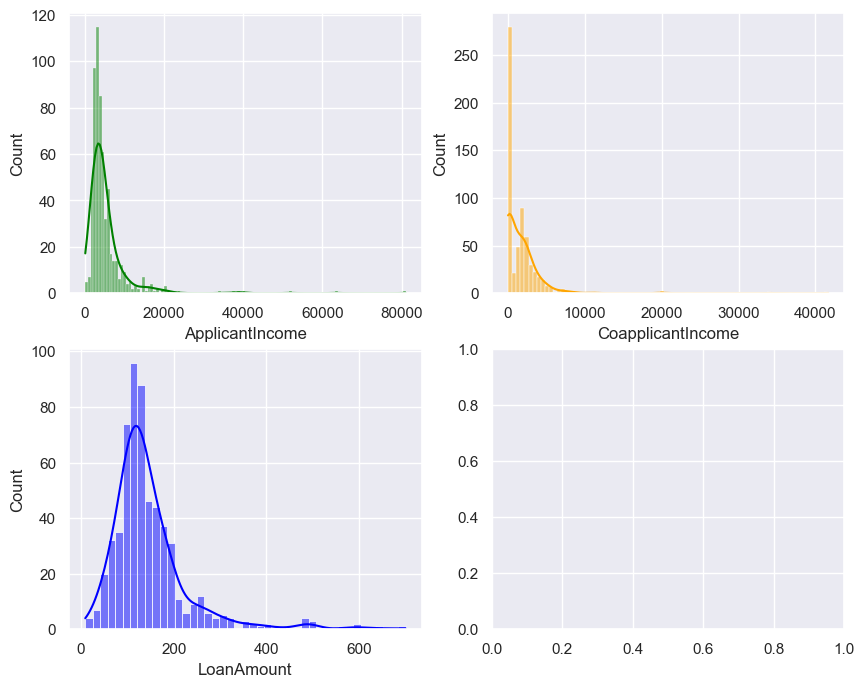

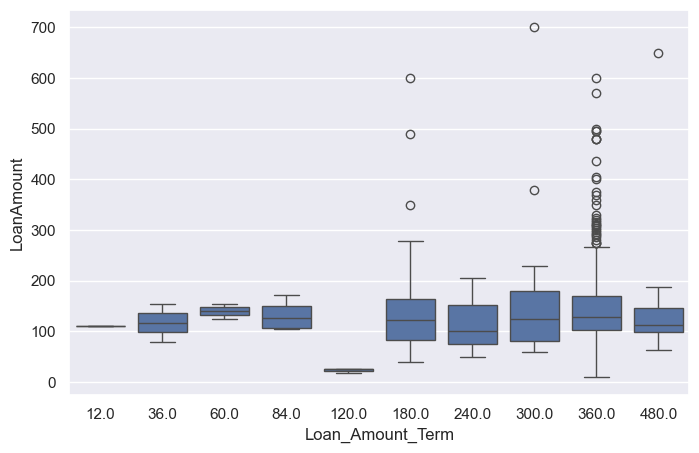

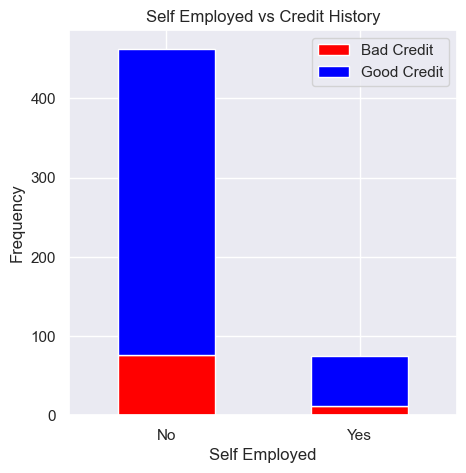

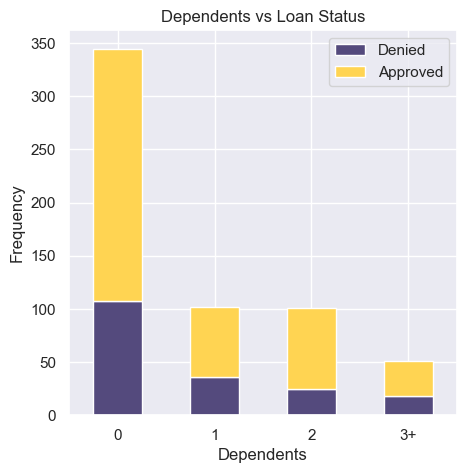

In [395]:
sns.set(style='darkgrid')

fig, axs = plt.subplots(2, 2, figsize=(10,8))
sns.histplot(data=train_data, x='ApplicantIncome', ax=axs[0,0] , kde=True, color='green')
sns.histplot(data=train_data, x='CoapplicantIncome', ax=axs[0,1] , kde=True, color='orange')
sns.histplot(data=train_data, x='LoanAmount', ax=axs[1,0] , kde=True, color='blue')

fig = plt.subplots(figsize=(8, 5))
sns.boxplot(data=train_data, x='Loan_Amount_Term', y='LoanAmount')

pd.crosstab(train_data.Self_Employed, train_data.Credit_History).plot(kind='bar', stacked=True, figsize=(5,5), color=['#FF0000','#0000FF'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(['Bad Credit', 'Good Credit'])
plt.xticks(rotation=0)
plt.show()

pd.crosstab(train_data.Dependents, train_data.Loan_Status).plot(kind='bar', stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Dependents vs Loan Status')
plt.xlabel('Dependents')
plt.ylabel('Frequency')
plt.legend(['Denied', 'Approved'])
plt.xticks(rotation=0)
plt.show()

## Data Preprocessing

#### Data Imputation

In [50]:
# Categorical Data
train_data['Gender'] = train_data['Gender'].fillna(train_data['Gender'].mode()[0])
train_data['Married'] = train_data['Married'].fillna(train_data['Married'].mode()[0])
train_data['Dependents'] = train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
train_data['Self_Employed'] = train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])
train_data['Credit_History'] = train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0])


train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].mode()[0])
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0])

#### Remove Outliers

In [51]:
numerical_columns = train_data.select_dtypes(include=['number']).columns
columns_for_iqr = numerical_columns.drop(['Credit_History', 'Loan_Amount_Term'])

Q1 = train_data[columns_for_iqr].quantile(0.25)
Q3 = train_data[columns_for_iqr].quantile(0.75)
IQR = Q3 - Q1

train_data = train_data[~((train_data[columns_for_iqr] < (Q1 - 1.5 * IQR)) | (train_data[columns_for_iqr] > (Q3 + 1.5 * IQR))).any(axis=1)]

#### 

#### Feature Engineering

In [52]:
train_data = train_data.copy()

train_data.loc[:, 'TotalHouseholdIncome'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
train_data.loc[:, 'MonthlyLoanPayment'] = train_data['LoanAmount'] / (train_data['Loan_Amount_Term'] / 30.417)
train_data.loc[:, 'DTI_Ratio'] = train_data['MonthlyLoanPayment'] / train_data['TotalHouseholdIncome']
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalHouseholdIncome,MonthlyLoanPayment,DTI_Ratio
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,5849.0,10.139000,0.001733
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,10.814933,0.001776
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,5.576450,0.001859
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,10.139000,0.002052
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,11.913325,0.001986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,5.998908,0.002069
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,6.759333,0.001646
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,21.376392,0.002572
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,15.799942,0.002084


Loan_Amount_Term    0
Credit_History      0
dtype: int64


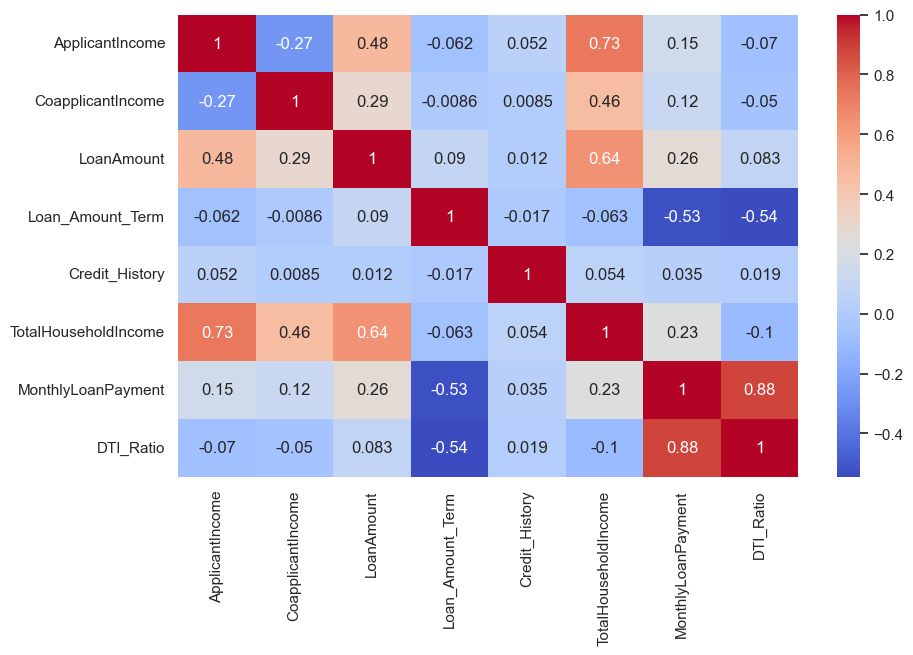

In [53]:
plt.figure(figsize=(10,6))

sns.heatmap(train_data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')

print(np.isinf(train_data[['Loan_Amount_Term', 'Credit_History']]).sum())

#### One-hot Encoding

In [54]:
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(train_data[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns), index=train_data.index)

train_data = pd.concat([train_data, one_hot_df], axis=1)
train_data.drop(categorical_columns, axis=1, inplace=True)

train_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalHouseholdIncome,MonthlyLoanPayment,DTI_Ratio,Gender_Female,Gender_Male,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,120.0,360.0,1.0,5849.0,10.139000,0.001733,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,4583,1508.0,128.0,360.0,1.0,6091.0,10.814933,0.001776,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3000,0.0,66.0,360.0,1.0,3000.0,5.576450,0.001859,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,2583,2358.0,120.0,360.0,1.0,4941.0,10.139000,0.002052,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6000,0.0,141.0,360.0,1.0,6000.0,11.913325,0.001986,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,2900.0,5.998908,0.002069,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
610,4106,0.0,40.0,180.0,1.0,4106.0,6.759333,0.001646,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
611,8072,240.0,253.0,360.0,1.0,8312.0,21.376392,0.002572,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
612,7583,0.0,187.0,360.0,1.0,7583.0,15.799942,0.002084,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Addressing the Skewness

<Axes: xlabel='LoanAmount', ylabel='Count'>

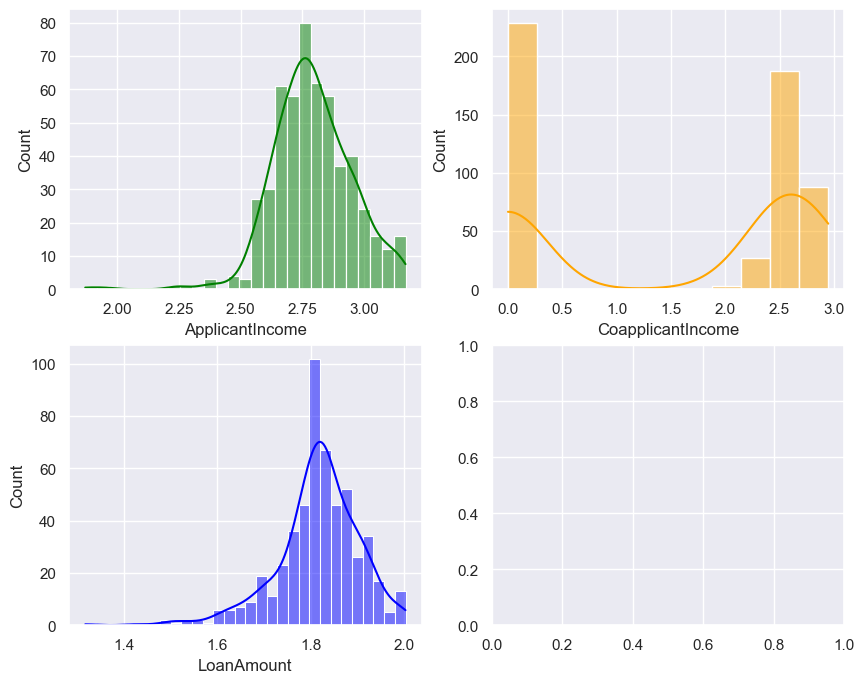

In [118]:
train_data.ApplicantIncome = np.sqrt(train_data.ApplicantIncome)
train_data.CoapplicantIncome = np.sqrt(train_data.CoapplicantIncome)
train_data.LoanAmount = np.sqrt(train_data.LoanAmount)

sns.set_theme(style='darkgrid')

fig, axs = plt.subplots(2, 2, figsize=(10,8))

sns.histplot(data=train_data, x='ApplicantIncome', ax=axs[0,0] , kde=True, color='green')
sns.histplot(data=train_data, x='CoapplicantIncome', ax=axs[0,1] , kde=True, color='orange')
sns.histplot(data=train_data, x='LoanAmount', ax=axs[1,0] , kde=True, color='blue')

## Model Development

#### Using Random Forest Regressor as the First Model

In [278]:
X = train_data.drop(['LoanAmount'], axis=1)
y = train_data['LoanAmount']

X = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rf_model = RandomForestRegressor(random_state=0, oob_score=True)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
oob_score = rf_model.oob_score_

print(f'Random Forest Out-of-Bag Score: {oob_score}')
print(f'Random Forest MSE: {mse}')
print(f'Random Forest R^2: {r2}')

Random Forest Out-of-Bag Score: 0.9462111841924802
Random Forest MSE: 0.0007744609445800214
Random Forest R^2: 0.9303488605074197


##### Hyperparameter Tuning

In [358]:
rf_model = RandomForestRegressor()

param_grid = {
"n_estimators": [400, 600, 800],
"max_depth": [100, 150, 200],
}

grid_search = GridSearchCV(
    rf_model,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    n_jobs=-1,
    verbose=5,
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [100, 150, 200],
                         'n_estimators': [400, 600, 800]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=5)

In [359]:
best_forest = grid_search.best_estimator_

In [360]:
best_forest.score(X_test, y_test)

0.9318908836437666

#### Using the XGBoost Model for Loan Amount Prediction

In [275]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=0, early_stopping_rounds=3)

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

y_pred = xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'XGBoost R^2: {r2}')
print(f'XGBoost MSE: {mse}')

[0]	validation_0-rmse:0.08394
[1]	validation_0-rmse:0.06842
[2]	validation_0-rmse:0.05706
[3]	validation_0-rmse:0.04722
[4]	validation_0-rmse:0.04014
[5]	validation_0-rmse:0.03574
[6]	validation_0-rmse:0.03232
[7]	validation_0-rmse:0.02997
[8]	validation_0-rmse:0.02802
[9]	validation_0-rmse:0.02670
[10]	validation_0-rmse:0.02595
[11]	validation_0-rmse:0.02546
[12]	validation_0-rmse:0.02510
[13]	validation_0-rmse:0.02469
[14]	validation_0-rmse:0.02437
[15]	validation_0-rmse:0.02411
[16]	validation_0-rmse:0.02393
[17]	validation_0-rmse:0.02381
[18]	validation_0-rmse:0.02365
[19]	validation_0-rmse:0.02352
[20]	validation_0-rmse:0.02344
[21]	validation_0-rmse:0.02335
[22]	validation_0-rmse:0.02333
[23]	validation_0-rmse:0.02327
[24]	validation_0-rmse:0.02325
[25]	validation_0-rmse:0.02322
[26]	validation_0-rmse:0.02321
[27]	validation_0-rmse:0.02319
[28]	validation_0-rmse:0.02317
[29]	validation_0-rmse:0.02316
[30]	validation_0-rmse:0.02313
[31]	validation_0-rmse:0.02312
[32]	validation_0-

#### K fold Cross-Validation

In [394]:
# Do k fold cross validation for the tuned random forest regression model
kf = KFold(n_splits=5, shuffle=True, random_state=0)

cross_val_results = cross_val_score(best_forest, X, y, cv=kf)

print(f'Random Forest Cross-Validation R^2 Scores: {cross_val_results}')
print(f'Mean R^2 Score: {cross_val_results.mean()}')

# Do k fold cross validation for the XGBoost Model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=0)

cross_val_xgb = cross_val_score(xgb_model, X, y, cv=kf)

print()
print(f'XGBoost Cross-Validation R^2 Scores: {cross_val_xgb}')
print(f'Mean R^2 Score: {cross_val_xgb.mean()}')

Random Forest Cross-Validation R^2 Scores: [0.92976234 0.96023092 0.954471   0.95040071 0.939327  ]
Mean R^2 Score: 0.9468383933511113

XGBoost Cross-Validation R^2 Scores: [0.9519684  0.95180648 0.91412663 0.96629773 0.9598932 ]
Mean R^2 Score: 0.9488184858822706
